In [17]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
# from collections import Counter
import numpy as np
import seaborn as sns
import sys
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [23]:
with open("firmendb_data/data_firmen.csv", encoding="utf-8") as f:
    df = pd.read_csv(f, delimiter=";")

df.head()

,Offizieller_Name,streetAddress,postalCode,addressLocality,Telefon,Email,Fax,Internet,Handelsregister,Rechtsform,...,Holding,Branche,Unternehmensgegendstand,Marken,Umsatzsteuer-Id,Mitarbeiter,Stammkapital,Umsatz,Börse,postOfficeBoxNumber
0,"Klein, Bertelt, Klein Rechtsanwälte in Partner...",Dillinger Strasse 18,66701,Beckingen,+49 (06835) 92351,info@rakbk.de,+49 (0681) 9235120,www.rakbk.de,"PR 81, Amtsgericht Saarbrücken",NaN,...,NaN,Rechtsanwälte und Anwaltskanzleien,Gegenstand des Unternehmens ist die gemeinscha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Puhl GmbH,Südstrasse 6,66701,Beckingen,+49 (06835) 9220 0,info@spedition-puhl.de,+49 (06835) 922020,www.puhl.eu,"HRB 63518, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,...,NaN,Speditionen / Bauunternehmen,NaN,NaN,DE137970178,40 in Deutschland,NaN,NaN,NaN,NaN
2,Cass - Tech - GmbH,Kapellenstrasse 51,66701,Beckingen,+49 (06832) 8080530,info@cass-tech.de,+49 (06832) 8080529,www.cass-tech.de,"HRB 19163, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,...,NaN,Stahlbau und Leichtmetallbau,Metallbau und Konstruktion.,NaN,NaN,NaN,25.000 Euro,NaN,NaN,NaN
3,Malermeister + Stuckateurbetrieb Arno Schorn GmbH,Auf Schlädt 24,66701,Beckingen,+49 (06832) 1314,info@malermeisterschorn.de,+49 (06832) 128300,www.malermeisterschorn.de,"HRB 18614, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,...,NaN,Maler und Lackierer,Gegenstand des Unternehmens ist der Betrieb ei...,NaN,NaN,NaN,25.000 Euro,NaN,NaN,NaN
4,FST Logistik GmbH,Auf der Heide 46 b,66701,Beckingen,+49 (06832) 8080460,luttermann@fst-gmbh.de,+49 (06832) 80563,www.fst-gmbh.de,"HRB 18570, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,...,NaN,Logistik,Gegenstand des Unternehmens ist die Durchführu...,NaN,NaN,NaN,25.000 Euro,NaN,NaN,NaN


In [19]:
df.shape

(17265, 28)

In [20]:
df.dtypes # interesting features: Rechtsform (799), Firmengründung (3325), Branche (2525), Mitarbeiter (504), Stammkapital (951), Umsatz (21)

Offizieller_Name            object
streetAddress               object
postalCode                   int64
addressLocality             object
Telefon                     object
Email                       object
Fax                         object
Internet                    object
Handelsregister             object
Rechtsform                  object
Hauptsitz                   object
Firmengründung             float64
Gründung                   float64
Inhaber                     object
Geschäftsführung            object
Vorstand                    object
Aufsichtsrat                object
Gesellschafter              object
Holding                     object
Branche                     object
Unternehmensgegendstand     object
Marken                      object
Umsatzsteuer-Id             object
Mitarbeiter                 object
Stammkapital                object
Umsatz                      object
Börse                       object
postOfficeBoxNumber         object
dtype: object

In [25]:
df = df.dropna(subset = ['Rechtsform'], axis =0)
df.shape

(14054, 28)

In [26]:
df = df.dropna(subset = ['Firmengründung'], axis =0)
df.shape

(2914, 28)

In [24]:
df = df.dropna(subset = ['Branche'], axis =0)
df.shape

(14740, 28)

In [8]:
# maybe exclude
df = df.dropna(subset = ['Mitarbeiter'], axis =0)
df.shape

(263, 28)

In [22]:
df = df.dropna(subset = ['Stammkapital'], axis =0)
df.shape

(887, 28)

In [31]:
# don't drop these, we will have too few instances
df = df.dropna(subset = ['Umsatz'], axis =0)
df.shape

(7, 28)

In [27]:
df.head()

,Offizieller_Name,streetAddress,postalCode,addressLocality,Telefon,Email,Fax,Internet,Handelsregister,Rechtsform,...,Holding,Branche,Unternehmensgegendstand,Marken,Umsatzsteuer-Id,Mitarbeiter,Stammkapital,Umsatz,Börse,postOfficeBoxNumber
2,Cass - Tech - GmbH,Kapellenstrasse 51,66701,Beckingen,+49 (06832) 8080530,info@cass-tech.de,+49 (06832) 8080529,www.cass-tech.de,"HRB 19163, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,...,NaN,Stahlbau und Leichtmetallbau,Metallbau und Konstruktion.,NaN,NaN,NaN,25.000 Euro,NaN,NaN,NaN
3,Malermeister + Stuckateurbetrieb Arno Schorn GmbH,Auf Schlädt 24,66701,Beckingen,+49 (06832) 1314,info@malermeisterschorn.de,+49 (06832) 128300,www.malermeisterschorn.de,"HRB 18614, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,...,NaN,Maler und Lackierer,Gegenstand des Unternehmens ist der Betrieb ei...,NaN,NaN,NaN,25.000 Euro,NaN,NaN,NaN
4,FST Logistik GmbH,Auf der Heide 46 b,66701,Beckingen,+49 (06832) 8080460,luttermann@fst-gmbh.de,+49 (06832) 80563,www.fst-gmbh.de,"HRB 18570, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,...,NaN,Logistik,Gegenstand des Unternehmens ist die Durchführu...,NaN,NaN,NaN,25.000 Euro,NaN,NaN,NaN
5,reaktiv 2010 UG (haftungsbeschränkt),Ahornweg 15,66701,Beckingen,+49 (06835) 6070181,info@reaktiv2010.de,+49 (06835) 6070180,www.reaktiv2010.de,"HRB 19016, Amtsgericht Saarbrücken",UG (haftungsbeschränkt): Unternehmergesellscha...,...,NaN,Dienstleistungen a.n.g.,Gegenstand des Unternehmens ist die Erbringung...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MHT Federspiel Heizung + Sanitär GmbH,Auf dem Gehren 23,66701,Beckingen,+49 (06832) 7187,NaN,+49 (06832) 800037,NaN,"HRB 16176, Amtsgericht Saarbrücken",GmbH: Gesellschaft mit beschränkter Haftung,...,NaN,"Klempnerei, Gasinstallation, Wasserinstallatio...",Gegenstand des Unternehmens ist der Betrieb ei...,NaN,NaN,NaN,25.000 Euro,NaN,NaN,NaN


In [11]:
# features = Rechtsform, Firmengründung (3325), Branche (2525), Mitarbeiter (504), Stammkapital (951), Umsatz (21)
features = ["Rechtsform", "Firmengründung", "Branche", "Stammkapital", "addressLocality"]

In [28]:
d = dict()
for i, x in enumerate(df["Rechtsform"].unique()):
    d[x] = i
df["Rechtsform"] = df["Rechtsform"].map(d)

d = dict()
for i, x in enumerate(df["Branche"].unique()):
    d[x] = i
df["Branche"] = df["Branche"].map(d)

# d = dict()
# for i, x in enumerate(df["Mitarbeiter"].unique()):
    # d[x] = i
# df["Mitarbeiter"] = df["Mitarbeiter"].map(d)

# d = dict()
# for i, x in enumerate(df["Stammkapital"].unique()):
    # d[x] = i
# df["Stammkapital"] = df["Stammkapital"].map(d)

d = dict()
for i, x in enumerate(df["addressLocality"].unique()):
    d[x] = i
df["addressLocality"] = df["addressLocality"].map(d)

d

{'Beckingen': 0,
 'Bexbach': 1,
 'Blieskastel': 2,
 'Bous': 3,
 'Dillingen': 4,
 'Ensdorf': 5,
 'Eppelborn': 6,
 'Freisen': 7,
 'Friedrichsthal': 8,
 'Gersheim': 9,
 'Grossrosseln': 10,
 'Heusweiler': 11,
 'Homburg': 12,
 'Illingen': 13,
 'Kirkel': 14,
 'Kleinblittersdorf': 15,
 'Lebach': 16,
 'Losheim': 17,
 'Mandelbachtal': 18,
 'Marpingen': 19,
 'Merchweiler': 20,
 'Merzig': 21,
 'Mettlach': 22,
 'Nalbach': 23,
 'Namborn': 24,
 'Neunkirchen': 25,
 'Nohfelden': 26,
 'Nonnweiler': 27,
 'Oberthal': 28,
 'Ottweiler': 29,
 'Perl': 30,
 'Püttlingen': 31,
 'Quierschied': 32,
 'Rehlingen-Siersburg': 33,
 'Riegelsberg': 34,
 'Saarbrücken': 35,
 'Saarlouis': 36,
 'Saarwellingen': 37,
 'Schiffweiler': 38,
 'Schmelz': 39,
 'Schwalbach': 40,
 'Spiesen-Elversberg': 41,
 'St. Ingbert': 42,
 'St. Wendel': 43,
 'Sulzbach': 44,
 'Tholey': 45,
 'Überherrn': 46,
 'Ã\x9cberherrn': 47,
 'Völklingen': 48,
 'Wadern': 49,
 'Wadgassen': 50,
 'Wallerfangen': 51,
 'Weiskirchen': 52}

In [69]:
features = ["Branche", "Firmengründung", "Rechtsform"]
X = df[features]
y = df["addressLocality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 100)
print(X_train.shape, X_test.shape)

# dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 7, min_samples_leaf = 3)
# dtree = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=7, min_samples_leaf=3, min_samples_split=8, max_leaf_nodes=34)
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=7, min_samples_leaf=2, min_samples_split=5, random_state=100)
# dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)

# Performing training
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print ("Accuracy:", accuracy_score(y_test,y_pred)*100, "%")
# print("Report:\n", classification_report(y_test, y_pred))

(2622, 3) (292, 3)
Accuracy: 35.273972602739725 %


### Results
with firmen_db dataset
- dataset size: 136, training split: 122 (90%), test split: 14 (10%) (that is too small because not every class (Gemeinde) is represented adequately in this dataset)
- features: Branche, Mitarbeiter, Stammkapital, Firmengründung, Rechtsform
- output: Gemeinde (34 classes)
- model parameters: criterion=gini, random_state=100
- model performance: accuracy: 50.0%
- decision tree constructed as in picture generated below (number 1)

with larger dataset but less features (Branche (23 nodes) Stammkapital (9 nodes) Firmengründung (6 nodes) Mitarbeiter (3) Rechtsform)
- minus Mitarbeiter
- dataset size: 839, training split: 755, test split: 84
- features: Branche, Stammkapital, Firmengründung, Rechtsform (is not considered)
- output: Gemeinde (34 classes)
- model parameters: criterion=gini, random_state=100, max_depth=7, min_sample_leaf=3, min_samples_split=8, max_leaf_nodes=34
- model performance: accuracy: 44.0%
- decision tree construced as in picture below (number 2)

with larger dataset but less features (Branche, Firmengründung, Rechtsform)
- minus Stammkapital
- dataset size: 2914, training split: 2622, test split: 292
- features: Branche, Firmengründung, Rechtsform
- output: Gemeinde (34 classes)
- model parameters: criterion=entropy, random_state=100, max_depth=7, min_sample_leaf=2, min_samples_split=5
- model performance: accuracy: 35.3%
- decision tree constructed as in picture below (number 3, barely readable)

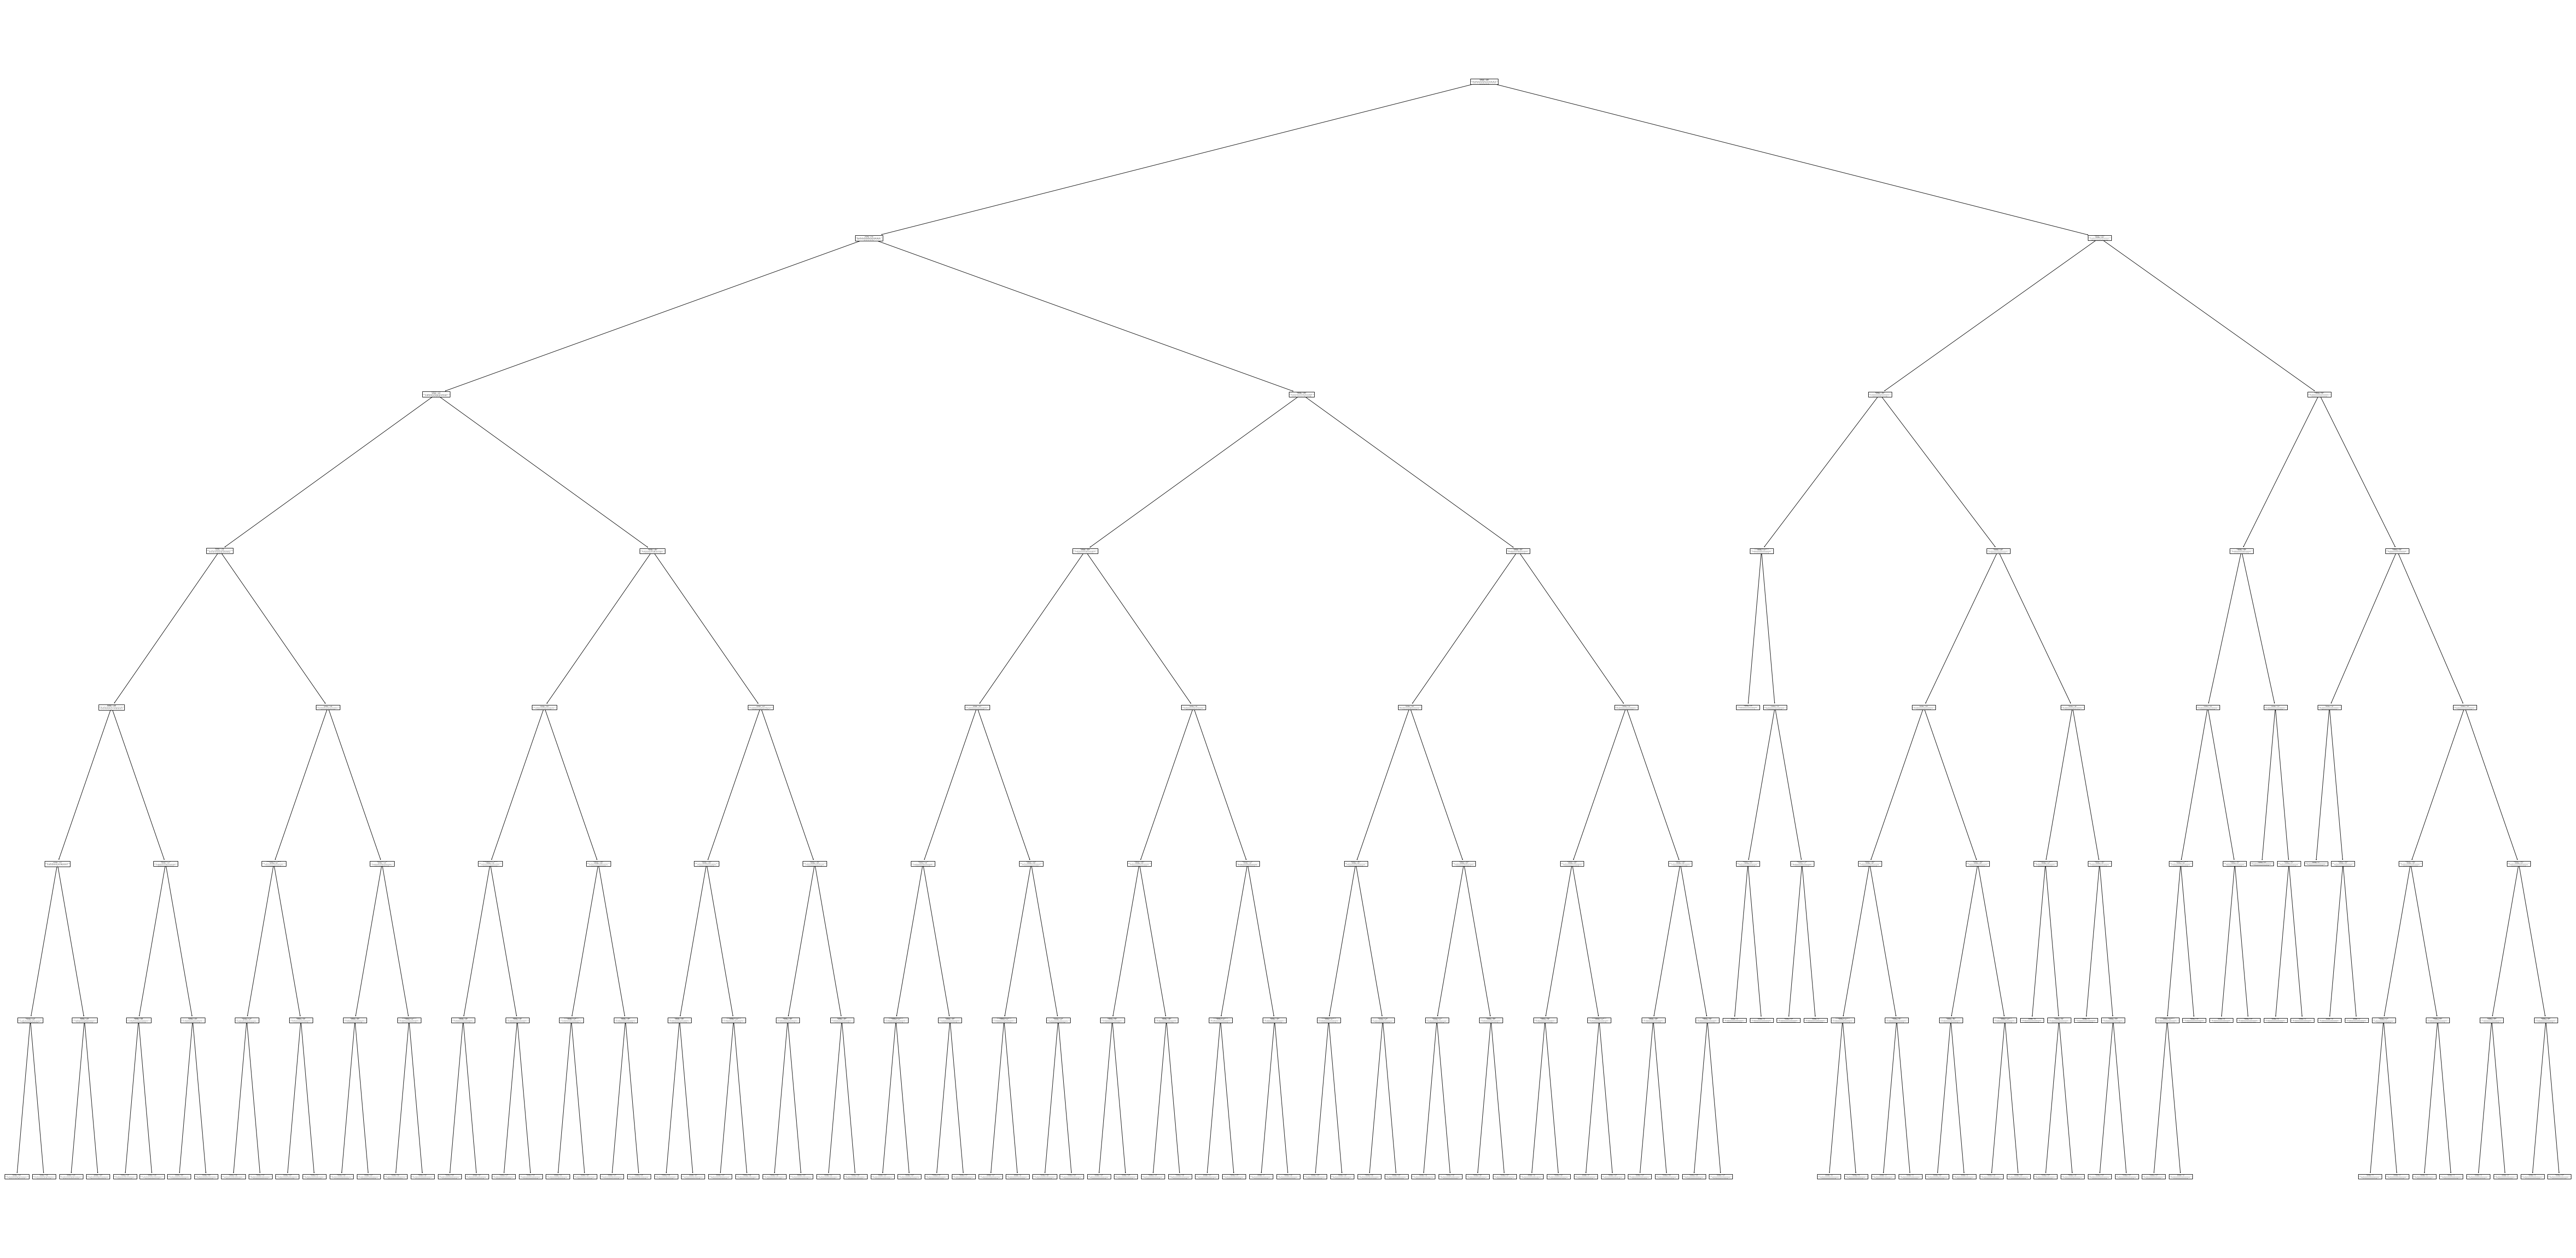

In [70]:
# plt.figure(figsize=(40,20))  # customize according to the size of your tree
plt.figure(figsize=(100,50))
_ = tree.plot_tree(dtree, feature_names = X.columns)
plt.savefig("tree.png")
plt.show()